In [4]:
!pip install rouge/requirements.txt
!pip install rouge-score

ERROR: Invalid requirement: 'rouge/requirements.txt'
Hint: It looks like a path. File 'rouge/requirements.txt' does not exist.


In [2]:
!pip install scikit-learn

In [5]:
import pandas as pd
import numpy as np
import math
from rouge_score import rouge_scorer
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

In [54]:
WikiHow_sample_leq512 = pd.read_csv('WikiHow_sample_leq512_withsummary.csv')
WikiHow_sample_in1024 = pd.read_csv('WikiHow_sample_in1024_withsummary.csv')
WikiHow_sample_in2048 = pd.read_csv('WikiHow_sample_in2048_withsummary.csv')

In [141]:
#merge data
WikiHow_sample_all = WikiHow_sample_leq512.loc[:36200,:].append(WikiHow_sample_in1024.loc[:8939,:], ignore_index=True)
WikiHow_sample_all = WikiHow_sample_all.append(WikiHow_sample_in2048.loc[:4503,:], ignore_index=True)

/var/folders/yf/zj5bn4xd37q4x_zscg34zr800000gn/T/ipykernel_803/3979278311.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  WikiHow_sample_all = WikiHow_sample_leq512.loc[:36200,:].append(WikiHow_sample_in1024.loc[:8939,:], ignore_index=True)
/var/folders/yf/zj5bn4xd37q4x_zscg34zr800000gn/T/ipykernel_803/3979278311.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  WikiHow_sample_all = WikiHow_sample_all.append(WikiHow_sample_in2048.loc[:4503,:], ignore_index=True)


In [154]:
# WikiHow_sample_all.to_csv('WikiHow_sample_all_withsummary.csv')

### Correlation & Rouge Score

In [61]:
def rouge_score(data):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'], use_stemmer=True)
    n = len(data[data['summary']!='empty'])
    i = 0
    df = data.loc[:n , :]
    for headline, summary in zip(df['headline'], df['summary']):
        scores = scorer.score(summary,headline)
        data.loc[i,'Rouge1'] = scores['rouge1'].fmeasure
        data.loc[i,'Rouge2'] = scores['rouge2'].fmeasure
        data.loc[i,'RougeL'] = scores['rougeL'].fmeasure
        data.loc[i,'RougeLsum'] = scores['rougeLsum'].fmeasure
        i += 1
    df = data.loc[:n , :]
    temp =  {'Rouge1': [df['Rouge1'].mean()], 
        'Rouge2': [df['Rouge2'].mean()], 
        'RougeL': [df['RougeL'].mean()],
        'RougeLsum': [df['RougeLsum'].mean()]} 
    rouge_table = pd.DataFrame(temp, index=['T5'])
    return data, rouge_table

In [77]:
def correlation(data):
    n = len(data[data['summary']!='empty'])
    df = data.loc[:n,:]
    temp = {'Rouge1': [df['text_length'].corr(df['Rouge1'])], 
        'Rouge2': [df['text_length'].corr(df['Rouge2'])], 
        'RougeL': [df['text_length'].corr(df['RougeL'])],
        'RougeLsum': [df['text_length'].corr(df['RougeLsum'])]} 
    corr_table = pd.DataFrame(temp, index=['text_length'])
    return corr_table

### Correlation & Rouge Score(512)

In [78]:
WikiHow_sample_leq512, rouge_512 = rouge_score(WikiHow_sample_leq512)

In [79]:
rouge_512

,Rouge1,Rouge2,RougeL,RougeLsum
T5,0.22396,0.051672,0.157843,0.181471


In [81]:
corr_512 = correlation(WikiHow_sample_leq512)

In [82]:
corr_512

,Rouge1,Rouge2,RougeL,RougeLsum
text_length,0.2084,0.080342,0.137084,0.182836


### Correlation & Rouge Score(1024)

In [84]:
WikiHow_sample_in1024, rouge_1024 = rouge_score(WikiHow_sample_in1024)

In [85]:
rouge_1024

,Rouge1,Rouge2,RougeL,RougeLsum
T5,0.235116,0.049828,0.153468,0.189088


In [86]:
corr_1024 = correlation(WikiHow_sample_in1024)

In [87]:
corr_1024

,Rouge1,Rouge2,RougeL,RougeLsum
text_length,-0.036393,-0.040527,-0.088894,-0.037442


### Correlation & Rouge Score(2048)

In [88]:
WikiHow_sample_in2048, rouge_2048 = rouge_score(WikiHow_sample_in2048)

In [89]:
rouge_2048

,Rouge1,Rouge2,RougeL,RougeLsum
T5,0.23207,0.048085,0.14163,0.189575


In [90]:
corr_2048 = correlation(WikiHow_sample_in2048)

In [91]:
corr_2048

,Rouge1,Rouge2,RougeL,RougeLsum
text_length,-0.009326,-0.012757,-0.054095,0.005177


### Correlation & Rouge Score (ALL)

In [157]:
WikiHow_sample_all, rouge_all = rouge_score(WikiHow_sample_all)

In [158]:
rouge_all

,Rouge1,Rouge2,RougeL,RougeLsum
T5,0.226698,0.051082,0.155553,0.18367


In [159]:
corr_all = correlation(WikiHow_sample_all)

In [160]:
corr_all

,Rouge1,Rouge2,RougeL,RougeLsum
text_length,0.087215,-0.002677,-0.03559,0.083093


### Linear regression(512)

In [32]:
# linear regression and anova table
import statsmodels.api as sm
from statsmodels.formula.api import ols

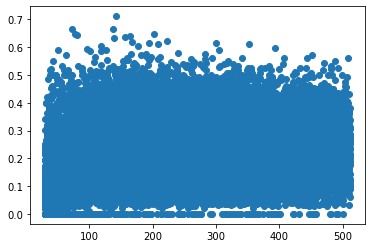

In [13]:
plt.plot(WikiHow_sample_leq512['text_length'],WikiHow_sample_leq512['Rouge1'],'o')

In [33]:
model = ols('Rouge1 ~ C(text_length)', data=df_cropped_scored[['text_length', 'Rouge1']]).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [35]:
anova_table

,sum_sq,df,F,PR(>F)
C(text_length),42.592242,480.0,10.224895,0.0
Residual,309.985856,35720.0,NaN,NaN


### Linear regression(1024)

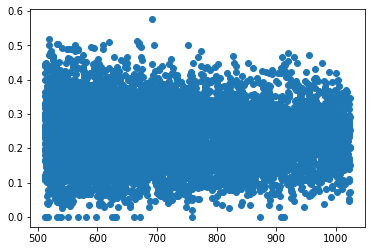

In [47]:
plt.plot(WikiHow_sample_in1024['text_length'],WikiHow_sample_in1024['Rouge1'],'o')

### Linear regression (ALL)

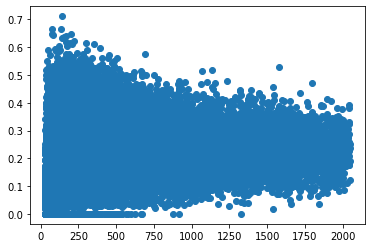

In [155]:
plt.plot(WikiHow_sample_all['text_length'],WikiHow_sample_all['Rouge1'],'o')

In [156]:
model = ols('Rouge1 ~ C(text_length)', data=WikiHow_sample_all[['text_length', 'Rouge1']]).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(text_length),52.247185,1988.0,3.255153,0.0
Residual,384.722083,47651.0,NaN,NaN
